https://paperswithcode.com/dataset/ett

In [1]:
#setup names in this data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
hoursoffset=timedelta(hours=48)
date='date'
var='OT'





start=datetime(2016, 7, 1)
#end=datetime(2018, 6, 26, 19)
startpred=datetime(2017, 11, 1)
end=startpred+hoursoffset

extrapred=startpred

print(startpred, end)



2017-11-01 00:00:00 2017-11-03 00:00:00


In [2]:
data_location = 'C:\\Users\\DellAdmin\\Documents\\TUD course\\Data Mining\\Assignment2\\Forecasting\\data\\ETT\\ETTh1.csv'

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.read_csv(data_location, sep=',')
df.head(5)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


Check for any missing values and look at them.  #None

In [3]:
df[df.isna().any(axis=1)]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [5]:

df[date] = pd.to_datetime(df[date])
df.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


In [6]:
print(df.OT.median())
print(df.date.min())
print(df.date.max())
print(df.date.median())

11.395999908447266
2016-07-01 00:00:00
2018-06-26 19:00:00
2017-06-28 21:30:00


In [7]:
 plt.ylabel()

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

In [8]:
def test_fits(timeseries, modelsin, arima=False, end=end):
  
   models=modelsin 
   if type(modelsin) != dict:
     print ("convert to dict from",  type(modelsin) )
   f=plt.figure(figsize=(12,8))  
   #f.ylabel("OT")
   #filter out any non arima plots
   print("here", modelsin.keys() )
   if arima:
        mykeys=[]
        for i in modelsin.keys():
          if (len(i) > 13 and (i[-13:] =="(0, 0, 0, 0))") )  or i[0] !='(' :
             mykeys.append(i)
          else: print ("reject ", i)
        models = { your_key.replace(", (0, 0, 0, 0))", "").replace("((",""): modelsin[your_key] for your_key in mykeys }
   else:
        mykeys=[]
        for i in modelsin.keys():
          if (len(i) > 13 and (i[-13:] !="(0, 0, 0, 0))")) or i[0] !='(' :
             mykeys.append(i)
          else: print ("reject ", i)
        models = { your_key: modelsin[your_key] for your_key in mykeys }
   orig = plt.plot(timeseries[startpred-hoursoffset:end], color = 'black', label = 'Original')
   plt.xticks(rotation=30)
   plt.ylabel("OT")
  # feeddataplt = plt.plot(feeddata[startpred-hoursoffset:startpred], color = 'black', label = 'tail_input_data')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   coli = 1
   maxcol=len(cols)

   for l, m in models.items():
      #print ("m is:", m)
      plt.plot(m, color = cols[coli], label = l, alpha=0.7)
      coli+=1
      if coli == maxcol:
         coli=1
   #a2 = plt.plot(arima_pred2, color = 'red', label = 'arima_pred2')
   #a3 = plt.plot(arima_pred3, color = 'green', label = 'arima_pred3')
   #a3 = plt.plot(arima_pred4, color = 'purple', label = 'arima_pred4')
 
   plt.legend(loc = 'best')
   plt.title('SARIMAX predictions')
   if  arima:  plt.title('ARIMA predictions')
   #plt.title('AR predictions')
   plt.show()
   coli = 1
   print (coli)
   MSEs=[]
   f=plt.figure(figsize=(12,8))  

   erra=[]
   for l, m in models.items():
      
      err=timeseries[startpred:end][var].values-m.values
      
      erra.append(err)
      try:
        plt.plot(erra[len(erra)-1], color = cols[coli], label = l, alpha=0.7)
      except:
         print ("max colors reached")
      MSE=sum(err*err)/len(err)
      MAE=sum(abs(err))/len(err)
      print (l, 'mae:', MAE, 'mse:', MSE)
      coli+=1
      if coli == maxcol:
        coli=1
   plt.ylabel("SARIMAX residuals")
   if  arima:  plt.ylabel('ARIMA residuals')
   plt.legend(loc = 'best')
   plt.title('SARIMAX residuals')
   if  arima:  plt.title('ARIMA residuals')
   #plt.ylabel("AR residuals")
   #plt.title('AR residuals')
   plt.show()
   return  erra 

In [9]:
df2 = df.copy()

rolledup_var = df2.groupby(df2[date].dt.strftime('%Y-%m-%d %H:00'))[var].sum().reset_index() 
rolledup_var[date] = pd.to_datetime(rolledup_var.date)
rolledup_var = rolledup_var.set_index(rolledup_var[date])
rolledup_var.drop(date, axis=1, inplace=True)
#rolledup_var.rename(columns = {'Date_': date}, inplace=True)




In [10]:
rolledup_var.columns

Index(['OT'], dtype='object')

In [11]:
rolledup_var.head()


,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000


In [12]:
feeddata=rolledup_var[:startpred].copy()



cols=['b','g', 'r', 'c', 'm', 'y', 'k']

arima_models={}

print("extrapolating from ", startpred, "to", end)

print(feeddata.tail())

extrapolating from  2017-11-01 00:00:00 to 2017-11-03 00:00:00
                        OT
date                      
2017-10-31 20:00:00  7.949
2017-10-31 21:00:00  7.949
2017-10-31 22:00:00  7.949
2017-10-31 23:00:00  7.949
2017-11-01 00:00:00  9.567


In [13]:
rolledup_var[:startpred]

,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000
...,...
2017-10-31 20:00:00,7.949000
2017-10-31 21:00:00,7.949000
2017-10-31 22:00:00,7.949000


<Figure size 432x288 with 0 Axes>

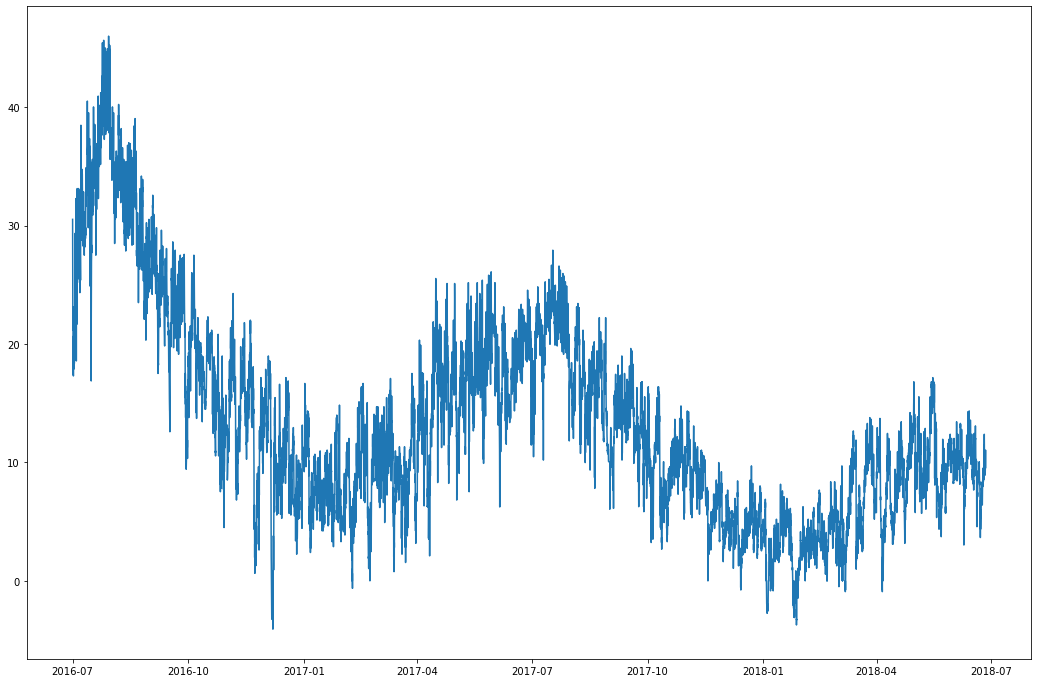

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(18,12))
plt.plot(rolledup_var)
plt.show()

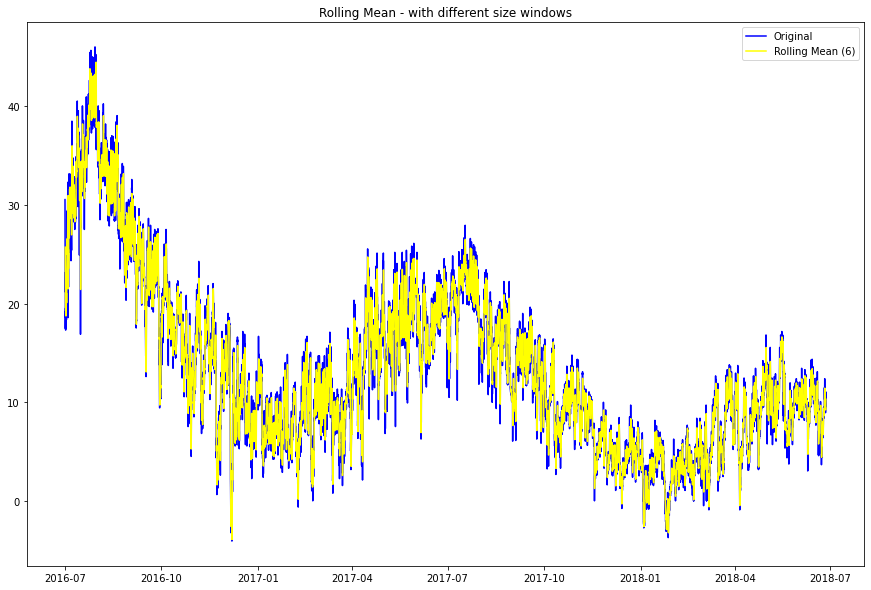

In [15]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15,10

def test_stationarity(timeseries):
   #Determining rolling statistics
   rolmean6 = timeseries.rolling(window = 6).mean()

   #plotting rolling statistics
   orig = plt.plot(timeseries, color = 'blue', label = 'Original')
   mean6 = plt.plot(rolmean6, color = 'yellow', label = 'Rolling Mean (6)')
   plt.legend(loc = 'best')
   plt.title('Rolling Mean - with different size windows')
   plt.show()

test_stationarity(rolledup_var)

In [16]:
plt.plot(rolledup_var.loc[rolledup_var < "2018-03-01" and rolledup_var > "2018-01-01"])

TypeError: Invalid comparison between dtype=float64 and str

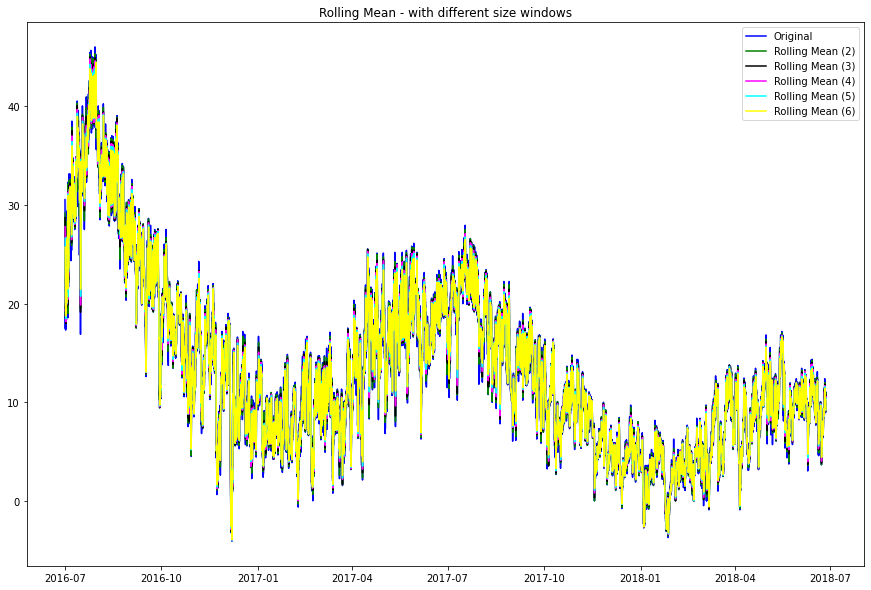

In [17]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15,10

def test_stationarity(timeseries):

   #Determining rolling statistics
   #rolmean1 = timeseries.rolling(window = 1).mean()
   rolmean2 = timeseries.rolling(window = 2).mean()
   rolmean3 = timeseries.rolling(window = 3).mean()
   rolmean4 = timeseries.rolling(window = 4).mean()
   rolmean5 = timeseries.rolling(window = 5).mean()
   rolmean6 = timeseries.rolling(window = 6).mean()

   #plotting rolling statistics
   orig = plt.plot(timeseries, color = 'blue', label = 'Original')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   mean2 = plt.plot(rolmean2, color = 'green', label = 'Rolling Mean (2)')
   mean3 = plt.plot(rolmean3, color = 'black', label = 'Rolling Mean (3)')
   mean4 = plt.plot(rolmean4, color = 'magenta', label = 'Rolling Mean (4)')
   mean5 = plt.plot(rolmean5, color = 'cyan', label = 'Rolling Mean (5)')
   mean6 = plt.plot(rolmean6, color = 'yellow', label = 'Rolling Mean (6)')
   plt.legend(loc = 'best')
   plt.title('Rolling Mean - with different size windows')
   plt.show()

test_stationarity(rolledup_var)

show date only up to 2017-11-01 00:00:00


C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


here dict_keys(['ar'])


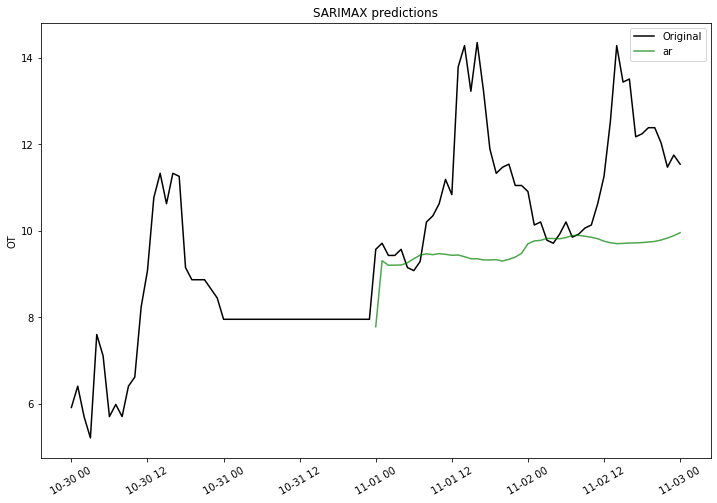

1
ar mae: 1.6653328287936218 mse: 4.834153156952778


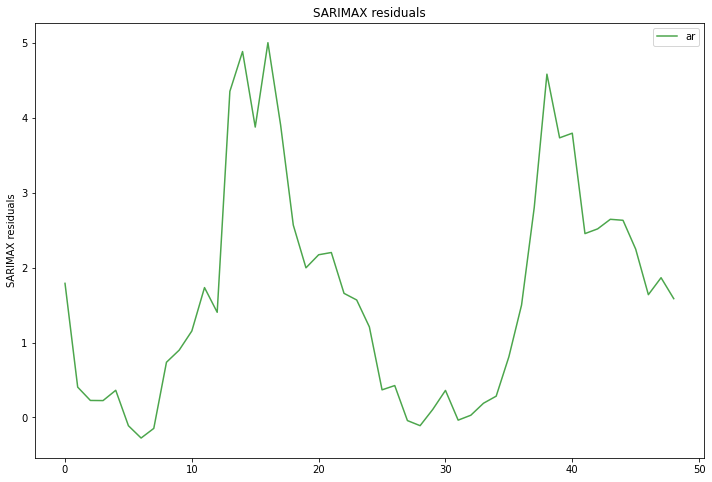

[array([ 1.7896618 ,  0.40441811,  0.22664252,  0.22487925,  0.36224276,
        -0.11074816, -0.27497132, -0.14634894,  0.73642737,  0.89760903,
         1.15344892,  1.73308738,  1.40329362,  4.35229203,  4.88354717,
         3.87546325,  5.0017214 ,  3.90386564,  2.56746021,  1.99683458,
         2.17113293,  2.20113173,  1.65630559,  1.56737429,  1.20807239,
         0.36828167,  0.4252816 , -0.04198548, -0.11000788,  0.10730767,
         0.36075424, -0.03624244,  0.02938224,  0.18966159,  0.28390974,
         0.80954937,  1.50044496,  2.80175543,  4.58163333,  3.73179022,
         3.79372689,  2.45355373,  2.51670807,  2.64455658,  2.63118631,
         2.24596642,  1.63836355,  1.86498415,  1.58529465])]

In [18]:
#Autoregression 
# Autoregression models the next step in the sequence as a linear function of the prior observed time steps

from statsmodels.tsa.ar_model import AR


print (f"show date only up to {startpred}")
#fit AR model
ar_model = AR(feeddata)#, missing='drop')#, freq=rolledup_var.index.inferred_freq)
model_fit = ar_model.fit(method='mle',maxiter=200 )


#make forecasing prediction
#ar_pred = model_fit.predict(start=start, end=end)
ar_pred = model_fit.predict(start=startpred, end=end)
#print results
ar_pred

def test_fitsar(timeseries):
   orig = plt.plot(timeseries[startpred-hoursoffset:], color = 'blue', label = 'Original')
   feeddata = plt.plot(timeseries[startpred-hoursoffset:startpred], color = 'black', label = 'tail_input_data')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   
   a1 = plt.plot(ar_pred, color = 'yellow', label = 'ar_pred')

 
   plt.legend(loc = 'best')
   plt.title('AR predictions')
   plt.show()
test_fits(rolledup_var, {'ar' : ar_pred})

In [19]:
rolledup_var.columns

Index(['OT'], dtype='object')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#'t' is linear trend
smodel1 = SARIMAX(feeddata, trend='ct', order=(0,1,1), seasonal_order=(0,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit1 = smodel1.fit()
#make predictions
extrapred=startpred
arima_models['(0,1,1),(1,1,0,24)'] = model_fit1.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

In [ ]:
#'t' is linear trend, c constant trend
smodel3 = SARIMAX(feeddata, trend='ct', order=(1,2,1), seasonal_order=(1,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit3 = smodel3.fit()
#make predictions
arima_models['(1,2,1),(1,1,0,24)'] = model_fit3.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

In [ ]:
#'t' is linear trend, c constant trend
smodel2 = SARIMAX(feeddata, trend='ct', order=(2,2,1), seasonal_order=(1,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit2 = smodel2.fit()
#make predictions
arima_models['(2,2,1),(1,1,0,24)'] = model_fit2.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

In [ ]:
#'t' is linear trend, c constant trend
smodel2 = SARIMAX(feeddata, trend='ct', order=(0,2,1), seasonal_order=(1,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit = smodel2.fit()
#make predictions
arima_models['(0,2,1),(0,1,1,24)'] = model_fit.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

In [20]:
results=[]
def funwrapper ( orders, data, startpred=startpred, end=end):
   from statsmodels.tsa.statespace.sarimax import SARIMAX
   import matplotlib.pyplot as plt
#'t' is linear trend
   smodel1 = SARIMAX(data, order=orders[0],seasonal_order=orders[1])
   model_fit1 = smodel1.fit()
   res=model_fit1.predict(start=startpred, end=end, typ='levels')
   plt.plot(res, color = 'b', label = str(orders), alpha=0.7)
   plt.legend(loc = 'best')
   plt.title(str(orders))
   plt.show()
   return  res

In [ ]:
import multiprocess as mp
from functools import partial
pool = mp.Pool(2)
from statsmodels.tsa.statespace.sarimax import SARIMAX



def funwrapper2 ( orders,data, startpred=startpred, end=end):
   import matplotlib.pyplot as plt
   from statsmodels.tsa.statespace.sarimax import SARIMAX
   
#'t' is linear trend
   smodel1 = SARIMAX(data, trend='ct', order=orders[0],seasonal_order=orders[1])
   model_fit1 = smodel1.fit()
   res=model_fit1.predict(start=startpred, end=end, typ='levels')
   plt.plot(res, color = 'b', label = str(orders), alpha=0.7)
   plt.legend(loc = 'best')
   plt.title(str(orders))
   plt.show()
   return  res
   
orders=[        ( ( 2,2,1 ) , (0,0,0,0)) ]
results=[]

results= pool.map(partial(funwrapper2, data=feeddata), orders ) 
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i]) +"trend"] = results[i]


In [ ]:
end

In [21]:
orders=[      ( ( 2,2,0 ) , (1,1,0,24)) ,
         ( ( 2,2,1 ) , (1,1,0,24)) ,  (( 2,2,1 ) , (1,2,0,24)) ,
         ( ( 2,2,1 ) , (2,1,0,24)) , ( ( 2,2,1 ) , (2,2,0,24)) ,
        ( ( 2,2,1 ) , (2,4,0,24)) 
         
       ]
results=[]
#orders=["as", "bs"]

results.append( pool.map(partial(funwrapper2, data=feeddata), orders ) )
pool.close()
print(results)

for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])+"trend"] = results[i]

NameError: name 'pool' is not defined

In [ ]:
pool = mp.Pool(1)
orders=[        ( (3,1,5 ) , (0,0,0,0) ) ]
results=[]
for i in orders:
    results.append(funwrapper(i, feeddata, startpred=startpred, end=end))
pool.close()
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
    

In [22]:
#best with no trend
import multiprocess as mp
from functools import partial
pool = mp.Pool(2)
from statsmodels.tsa.statespace.sarimax import SARIMAX

   #no good ( ( 2,2,1 ) , (1,1,0,24)) ,  ( ( 2,2,1 ) , (0,0,0,0)) ,


orders=[  (( 1,0,0 ) , (0,0,0,0)) , (( 2,0,0 ) , (0,0,0,0)) ,
          (( 2,2,1 ) , (0,0,0,0)) ,(( 1,2,1 ) , (0,0,0,0)) ,
           (( 2,1,1 ) , (0,0,0,0)) , (( 1,1,1 ) , (0,0,0,0)) ,
           (( 2,0,1 ) , (0,0,0,0)) , (( 1,0,1 ) , (0,0,0,0)) ,
          (( 0,0,1 ) , (0,0,0,0)) , (( 1,1,1 ) , (0,0,0,0)) ,
          (( 0,2,1 ) , (0,0,0,0)) , (( 0,1,2 ) , (0,0,0,0)) 
         
       ]

results=[]

#orders=["as", "bs"]


results= pool.map(partial(funwrapper, data=feeddata), orders )

#for i in orders:
#    results.append(funwrapper(orders, feeddata, startpred=startpred, end=end))
print(results)

for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
pool.close()


[2017-11-01 00:00:00    7.935987
2017-11-01 01:00:00    9.551339
2017-11-01 02:00:00    9.535703
2017-11-01 03:00:00    9.520093
2017-11-01 04:00:00    9.504509
2017-11-01 05:00:00    9.488950
2017-11-01 06:00:00    9.473416
2017-11-01 07:00:00    9.457908
2017-11-01 08:00:00    9.442426
2017-11-01 09:00:00    9.426968
2017-11-01 10:00:00    9.411536
2017-11-01 11:00:00    9.396129
2017-11-01 12:00:00    9.380748
2017-11-01 13:00:00    9.365391
2017-11-01 14:00:00    9.350060
2017-11-01 15:00:00    9.334754
2017-11-01 16:00:00    9.319473
2017-11-01 17:00:00    9.304217
2017-11-01 18:00:00    9.288986
2017-11-01 19:00:00    9.273780
2017-11-01 20:00:00    9.258598
2017-11-01 21:00:00    9.243442
2017-11-01 22:00:00    9.228310
2017-11-01 23:00:00    9.213203
2017-11-02 00:00:00    9.198121
2017-11-02 01:00:00    9.183064
2017-11-02 02:00:00    9.168031
2017-11-02 03:00:00    9.153023
2017-11-02 04:00:00    9.138039
2017-11-02 05:00:00    9.123080
2017-11-02 06:00:00    9.108146
2017-11

2017-11-01 00:00:00     7.123130
2017-11-01 01:00:00     9.227718
2017-11-01 02:00:00     9.066681
2017-11-01 03:00:00     8.696366
2017-11-01 04:00:00    10.014728
2017-11-01 05:00:00     9.810732
2017-11-01 06:00:00    10.429099
2017-11-01 07:00:00     9.868984
2017-11-01 08:00:00    10.753411
2017-11-01 09:00:00    10.837399
2017-11-01 10:00:00    10.951017
2017-11-01 11:00:00    10.909333
2017-11-01 12:00:00    10.621307
2017-11-01 13:00:00    10.833259
2017-11-01 14:00:00    11.105047
2017-11-01 15:00:00    10.370475
2017-11-01 16:00:00    10.687140
2017-11-01 17:00:00    10.525446
2017-11-01 18:00:00     9.945515
2017-11-01 19:00:00    10.365915
2017-11-01 20:00:00    10.690532
2017-11-01 21:00:00    11.431723
2017-11-01 22:00:00    11.781464
2017-11-01 23:00:00    12.224142
2017-11-02 00:00:00    14.746587
2017-11-02 01:00:00    13.966365
2017-11-02 02:00:00    14.214131
2017-11-02 03:00:00    14.041547
2017-11-02 04:00:00    14.232958
2017-11-02 05:00:00    14.283385
2017-11-02

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


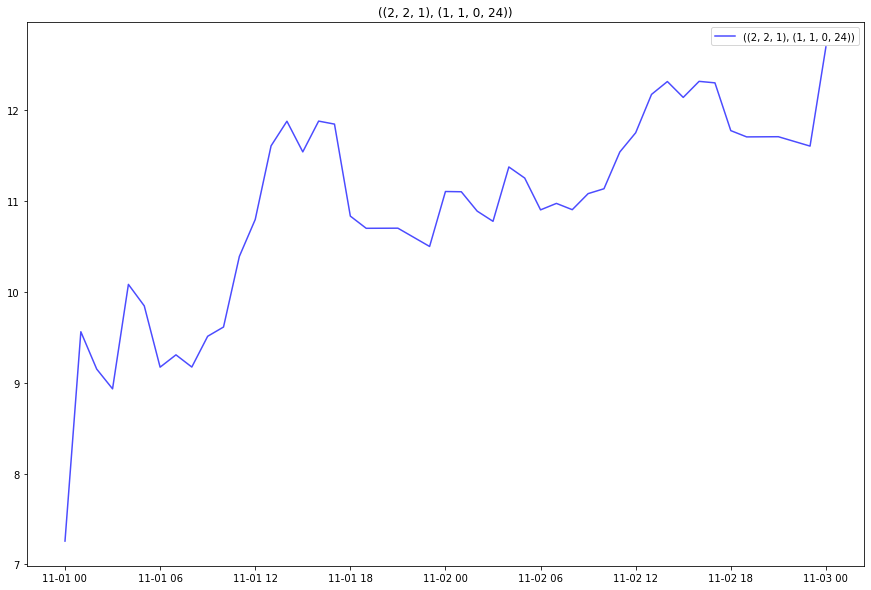

2017-11-01 00:00:00     7.255850
2017-11-01 01:00:00     9.560751
2017-11-01 02:00:00     9.149634
2017-11-01 03:00:00     8.931983
2017-11-01 04:00:00    10.082200
2017-11-01 05:00:00     9.845689
2017-11-01 06:00:00     9.170762
2017-11-01 07:00:00     9.306394
2017-11-01 08:00:00     9.172121
2017-11-01 09:00:00     9.510832
2017-11-01 10:00:00     9.612814
2017-11-01 11:00:00    10.390414
2017-11-01 12:00:00    10.796352
2017-11-01 13:00:00    11.607565
2017-11-01 14:00:00    11.878571
2017-11-01 15:00:00    11.541185
2017-11-01 16:00:00    11.879897
2017-11-01 17:00:00    11.846947
2017-11-01 18:00:00    10.833943
2017-11-01 19:00:00    10.699674
2017-11-01 20:00:00    10.700337
2017-11-01 21:00:00    10.701000
2017-11-01 22:00:00    10.600344
2017-11-01 23:00:00    10.499689
2017-11-02 00:00:00    11.104684
2017-11-02 01:00:00    11.102099
2017-11-02 02:00:00    10.889056
2017-11-02 03:00:00    10.776580
2017-11-02 04:00:00    11.375146
2017-11-02 05:00:00    11.252866
2017-11-02

In [23]:
import multiprocess as mp
from functools import partial
pool = mp.Pool(2)
from statsmodels.tsa.statespace.sarimax import SARIMAX

orders=[                (( 2,2,1 ) , (1,2,0,24)) ,
         ( ( 2,2,1 ) , (2,1,0,24)) ] 
            
results= pool.map(partial(funwrapper, data=feeddata), orders ) 
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
    
    
orders=[ ( ( 2,2,1 ) , (1,1,0,24)), ]
results=[]
#results = pool.map(partial(funwrapper, data=feeddata), orders )
#pool.close()
for i in orders:
    results.append(funwrapper(i, feeddata, startpred=startpred, end=end))
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
pool.close()


    

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#arima_model4 = ARIMA(feeddata, order=(2,2,1))
#model_fit4 = arima_model4.fit()
#arima_models['(2,2,1)'] = model_fit4.predict(start=startpred, end=end, typ='levels')

arima_model = ARIMA(feeddata, order=(1,0,0))
model_fit = arima_model.fit()
arima_models['(1,0,0)'] = model_fit.predict(start=startpred, end=end, typ='levels')

In [ ]:
rv


here dict_keys(['((1, 0, 0), (0, 0, 0, 0))', '((2, 0, 0), (0, 0, 0, 0))', '((2, 2, 1), (0, 0, 0, 0))', '((1, 2, 1), (0, 0, 0, 0))', '((2, 1, 1), (0, 0, 0, 0))', '((1, 1, 1), (0, 0, 0, 0))', '((2, 0, 1), (0, 0, 0, 0))', '((1, 0, 1), (0, 0, 0, 0))', '((0, 0, 1), (0, 0, 0, 0))', '((0, 2, 1), (0, 0, 0, 0))', '((0, 1, 2), (0, 0, 0, 0))', '((2, 2, 1), (1, 2, 0, 24))', '((2, 2, 1), (2, 1, 0, 24))', '((2, 2, 1), (1, 1, 0, 24))'])
reject  ((1, 0, 0), (0, 0, 0, 0))
reject  ((2, 0, 0), (0, 0, 0, 0))
reject  ((2, 2, 1), (0, 0, 0, 0))
reject  ((1, 2, 1), (0, 0, 0, 0))
reject  ((2, 1, 1), (0, 0, 0, 0))
reject  ((1, 1, 1), (0, 0, 0, 0))
reject  ((2, 0, 1), (0, 0, 0, 0))
reject  ((1, 0, 1), (0, 0, 0, 0))
reject  ((0, 0, 1), (0, 0, 0, 0))
reject  ((0, 2, 1), (0, 0, 0, 0))
reject  ((0, 1, 2), (0, 0, 0, 0))


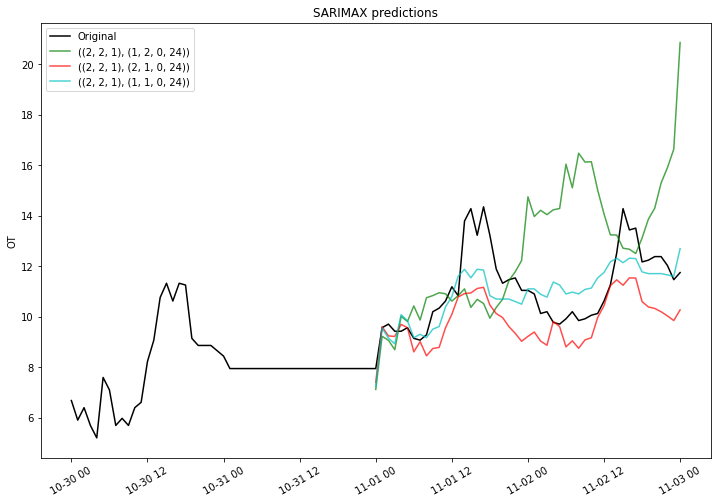

1
((2, 2, 1), (1, 2, 0, 24)) mae: 2.498277241540596 mse: 10.751104432723475
((2, 2, 1), (2, 1, 0, 24)) mae: 1.2992724748101947 mse: 2.5038339462423775
((2, 2, 1), (1, 1, 0, 24)) mae: 0.8667337357260215 mse: 1.1601166197216324


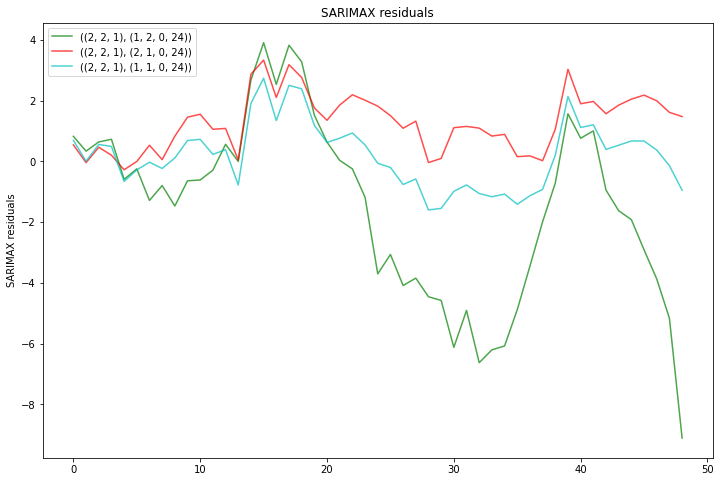

[array([ 8.25870138e-01,  3.39282083e-01,  6.41318753e-01,  7.29633297e-01,
        -5.88728274e-01, -2.43731392e-01, -1.28409887e+00, -7.93984579e-01,
        -1.46741050e+00, -6.37399550e-01, -6.10017086e-01, -2.87333397e-01,
         5.63693531e-01, -2.58735386e-04,  2.68295284e+00,  3.90952471e+00,
         2.53786071e+00,  3.82555390e+00,  3.27948506e+00,  1.52308482e+00,
         6.35468115e-01,  3.52769596e-02, -2.44464045e-01, -1.18014281e+00,
        -3.70258735e+00, -3.06236441e+00, -4.08413071e+00, -3.84154676e+00,
        -4.45495859e+00, -4.57538511e+00, -6.12059974e+00, -4.90300723e+00,
        -6.62478269e+00, -6.20303140e+00, -6.07496124e+00, -4.88225030e+00,
        -3.44739880e+00, -1.98463922e+00, -7.11638508e-01,  1.56762737e+00,
         7.63392506e-01,  1.00539907e+00, -9.45091284e-01, -1.62367073e+00,
        -1.91760103e+00, -2.91110013e+00, -3.87079500e+00, -5.16510749e+00,
        -9.10594401e+00]),
 array([ 5.45280547e-01, -3.95118305e-02,  4.66398962e-01,  2

In [24]:
from numpy import roll


rv=rolledup_var.copy()
#I dont know why this is better
rv[var]=roll(rv[var],1)
#test_fits(rolledup_var, {'(0,0,0)': arima_models['(0,0,0)'], '(0,2,0)': arima_models['(0,2,0)']})
arima=True
test_fits(rv, arima_models, arima, end)
#rolledup_var[startpred-hoursoffset:]-arima_models['(0,2,0)']

In [ ]:
rv[startpred:end]


In [ ]:
arima_models['((2, 2, 1), (0, 0, 0, 0))']-arima_models['(2,2,1)']


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rolledup_var[startpred:]


In [ ]:
roll(rolledup_var,1)
type(rolledup_var)

In [ ]:

#plt.plot( (rolledup_var[startpred:].values - x.values))

plt.plot(x.values-rolledup_var[startpred:].values)
#len(rolledup_var[startpred:].values)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(rolledup_var[startpred-hoursoffset*5:end], model="additive")
decompose_data.plot();
rolledup_var.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
lims=(startpred-hoursoffset*3, end)
decompose_data = seasonal_decompose(rolledup_var, model="additive")
decompose_data.seasonal.plot(xlim=lims)
decompose_data.trend.plot(xlim=lims)
decompose_data.resid.plot(xlim=lims)
decompose_data._observed.plot(xlim=lims, ylim=(-8,25), label="truth")
plt.legend(loc = 'best')
plt.title(label="Decomposition of ETTh1",  loc = 'center')
#rolledup_var.plot(xlim=(startpred-hoursoffset*3, end))
plt.show()

In [ ]:
test_fits(rolledup_var)

In [ ]:
rolledup_var[startpred:]

In [ ]:
rolledup_var[startpred:].index-x.index

In [ ]:
#Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#fit ES model
ar_model = ExponentialSmoothing(feeddata, 
                                freq=rolledup_var.index.inferred_freq
                               )

model_fit = ar_model.fit()

#make forecasing prediction
es_pred = model_fit.predict(start=startpred, end=end)

#print results
es_pred
#es_pred.plot()

def test_fits(timeseries):
   orig = plt.plot(timeseries[extrapred:], color = 'blue', label = 'Original')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   
   a1 = plt.plot(es_pred, color = 'yellow', label = 'es_pred')
    
   plt.legend(loc = 'best')
   plt.title('Exponential Smoothing')
   plt.show()

test_fits(rolledup_var)

In [ ]:
help(ar_model.fit)

In [ ]:
#!conda install -c conda-forge pmdarima

In [ ]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(rolledup_var, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())